# Breast Cancer Classification

**Objective:** Classify tumors as benign or malignant

**Data:** Wisconsin Breast Cancer Database https://www.kaggle.com/chongchong33/breast-cancer-wisconsin-classification/data 

### Information about the data set:

**Features:**
1. `id`: Sample code number id number
2. `clump_thickness`: Clump Thickness 1-10
3. `size_uniformity`: Uniformity of Cell Size 1-10
4. `shape_uniformity`: Uniformity of Cell Shape 1-10
5. `marginial_adhesion`: Marginal Adhesion 1-10
6. `epithelial_size`: Single Epithelial Cell Size 1-10
7. `bare_nucleoli`: Bare Nuclei 1-10
8. `bland_chromatin`: Bland Chromatin 1-10
9. `normal_nucleoli`: Normal Nucleoli 1-10
10. `mitoses`: Mitoses 1-10  

**Target:**  

11. `class`: Class 2 for benign, 4 for malignant

**Class distribution:**

Benign: 458 (65.5%)  
Malignant: 241 (34.5%)

**Missing attribute values:**

16; denoted by "`?`"





In [95]:
import os
os.chdir('C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification\\tumor-classification\\') 
os.getcwd() 

'C:\\Users\\vrsom\\Documents\\Breast_Cancer_Classification\\tumor-classification'

## Data cleaning and preprocessing

In [96]:
import pandas as pd
import os

df = pd.read_csv('breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Find missing values:

In [97]:
mask = df=='?'
mask.sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

Change 16 missing values in `bare_nucleoli` to NaN:

In [98]:
df[mask]=float('NaN')

Show info:

In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      683 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


Delete rows with NaNs and change all data types to int:

In [100]:
df = df.dropna()
df = df.astype('int64')

Change classes to `False` (benign) and `True` (malignant) instead of 2 and 4:

In [101]:
df.loc[:,'class'] = df.loc[:,'class']==4
display(df.loc[:,'class'])

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696     True
697     True
698     True
Name: class, Length: 683, dtype: bool

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   clump_thickness    683 non-null    int64
 2   size_uniformity    683 non-null    int64
 3   shape_uniformity   683 non-null    int64
 4   marginal_adhesion  683 non-null    int64
 5   epithelial_size    683 non-null    int64
 6   bare_nucleoli      683 non-null    int64
 7   bland_chromatin    683 non-null    int64
 8   normal_nucleoli    683 non-null    int64
 9   mitoses            683 non-null    int64
 10  class              683 non-null    bool 
dtypes: bool(1), int64(10)
memory usage: 59.4 KB


Check means, range etc.:

In [103]:
print(df.drop('id',axis=1).describe())

       clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
count       683.000000       683.000000        683.000000         683.000000   
mean          4.442167         3.150805          3.215227           2.830161   
std           2.820761         3.065145          2.988581           2.864562   
min           1.000000         1.000000          1.000000           1.000000   
25%           2.000000         1.000000          1.000000           1.000000   
50%           4.000000         1.000000          1.000000           1.000000   
75%           6.000000         5.000000          5.000000           4.000000   
max          10.000000        10.000000         10.000000          10.000000   

       epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
count       683.000000     683.000000       683.000000       683.000000   
mean          3.234261       3.544656         3.445095         2.869693   
std           2.223085       3.643857         2.449697

I don't see anything unusual. Now, the data set has no missing or impossible values. 

## Splitting data

First, randomly separate 30% of the data points into a validation data set. This is important to validate the classifier on **independent** data later on.

In [104]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df,test_size=0.3,random_state=1)

Now separate feature matrix and target vector:

In [105]:
features_train = df_train.drop(['id','class'],axis=1)
features_val = df_val.drop(['id','class'],axis=1)

target_train = df_train.loc[:,'class']
target_val = df_val.loc[:,'class']

display(features_train)
display(target_train)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
631,5,1,1,1,2,1,2,1,1
633,8,7,4,4,5,3,5,10,1
203,5,1,1,1,2,1,3,1,1
42,6,10,10,2,8,10,7,3,3
571,7,6,10,5,3,10,9,10,2
...,...,...,...,...,...,...,...,...,...
148,3,1,1,3,8,1,5,8,1
661,4,1,1,1,2,1,3,1,1
74,10,6,4,1,3,4,3,2,3
242,2,1,1,1,2,1,3,1,1


631    False
633     True
203    False
42      True
571     True
       ...  
148    False
661    False
74      True
242    False
38      True
Name: class, Length: 478, dtype: bool

## Check for correlations among features and reduce dimensions with Principal Component Analysis (PCA)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.635755,0.650366,0.507064,0.524288,0.609916,0.557279,0.554315,0.366344
size_uniformity,0.635755,1.000000,0.917607,0.711849,0.748319,0.707644,0.763875,0.743973,0.490808
shape_uniformity,0.650366,0.917607,1.000000,0.692717,0.711943,0.718284,0.725238,0.737787,0.470340
marginal_adhesion,0.507064,0.711849,0.692717,1.000000,0.592563,0.716376,0.676607,0.607801,0.394772
epithelial_size,0.524288,0.748319,0.711943,0.592563,1.000000,0.576429,0.611069,0.672823,0.506416
bare_nucleoli,0.609916,0.707644,0.718284,0.716376,0.576429,1.000000,0.678199,0.574645,0.362370
bland_chromatin,0.557279,0.763875,0.725238,0.676607,0.611069,0.678199,1.000000,0.679565,0.350437
normal_nucleoli,0.554315,0.743973,0.737787,0.607801,0.672823,0.574645,0.679565,1.000000,0.443686
mitoses,0.366344,0.490808,0.470340,0.394772,0.506416,0.362370,0.350437,0.443686,1.000000


p = 2.942751174831744e-15


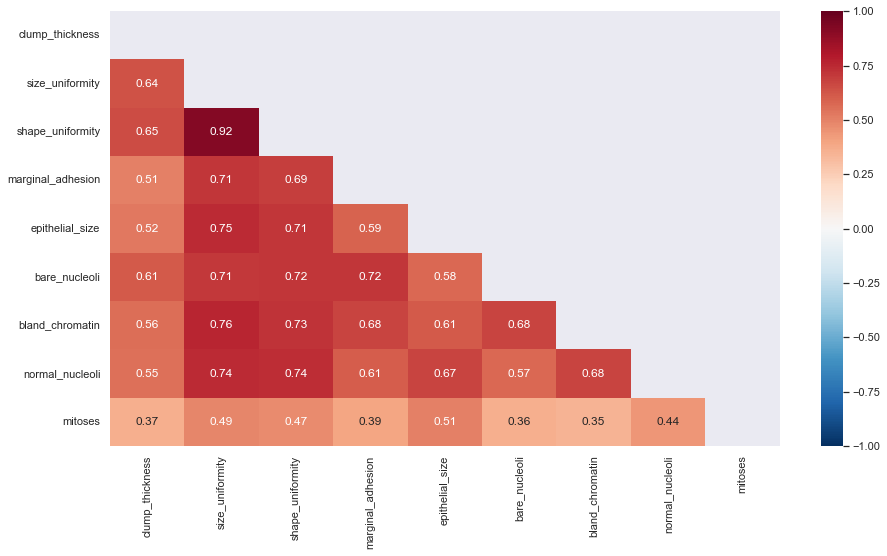

In [106]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Correlation matrix
corr = features_train.corr()
display(corr)

# Heatmap of all pairwise correlations
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='RdBu_r');

r,p = pearsonr(features_train.loc[:,'mitoses'],features_train.loc[:,'bland_chromatin'])
print('p = {}'.format(p))

The features show to be highly correlated to each other. Even the smallest correlation (between mitoses and bland_chromatin) is highly significant; see p-value. This means the features are not independent.

To have independent features, I use an **Principal Component Ananlysis (PCA)** reducing the dimensions.  
I define a pipeline `corr_transformer` that standardizes the data and computes a PCA including all columns except those specified in `keep_cols`. Because all features are correlated, I do not keep any of the original features, thus, `keep_cols` is empty here. For the PCA, I define that it should keep at least 80% of the variance in the data. Finally I fit and apply the pipeline on the training data.

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# if I wanted to leave out a feature from the PCA (e.g. mitoses because 
# it is less correlated to the others --> yields similar classification accuracy)
keep_cols = [] 

# features that are highly correlated
col_correlated = features_train.drop(keep_cols,axis=1).columns
    
# standardization + PCA (dimensionality reduction, keeping min. 80% of variance)
std_pca = Pipeline([('std', StandardScaler()), 
                    ('pca', PCA(n_components=0.8))
                   ])

# do nothing with keep_cols, drop rest (none in this case)
col_dropper = ColumnTransformer([('drop_unused_cols', 'passthrough', keep_cols)],
                                remainder='drop'
                               )
    
# PCA on cor_correlated only
corr_transformer = ColumnTransformer([('pca', std_pca, col_correlated)],
                                     remainder=col_dropper
                                    )

# fit & transform
arr = corr_transformer.fit_transform(features_train)
arr.shape

(478, 3)

The output from the transformation is an array with the columns representing the identified principal components. That means 7 features were reduced to 3 in this case.

I turn the array into a dataframe `features_train_pca` and transform the validation data in the same way (`features_val_pca`):

In [108]:
# transform training- and validation data
col_names = ['pca_0','pca_1','pca_2'] + keep_cols
features_train_pca = pd.DataFrame(arr, columns=col_names)
features_val_pca = pd.DataFrame(corr_transformer.transform(features_val), columns=col_names)
display(features_train_pca)

,pca_0,pca_1,pca_2
0,-1.607496,0.009278,-0.638855
1,2.271799,-0.371072,-0.001566
2,-1.467713,-0.091419,-0.553935
3,3.834433,0.215161,0.120485
4,3.958294,-1.112170,0.201717
...,...,...,...
473,0.540240,0.407648,1.481363
474,-1.573993,-0.050177,-0.246815
475,0.890899,0.552171,-2.011536
476,-1.786554,0.032307,0.367426


Checking for correlations again shows that the new features are independent:

<AxesSubplot:>

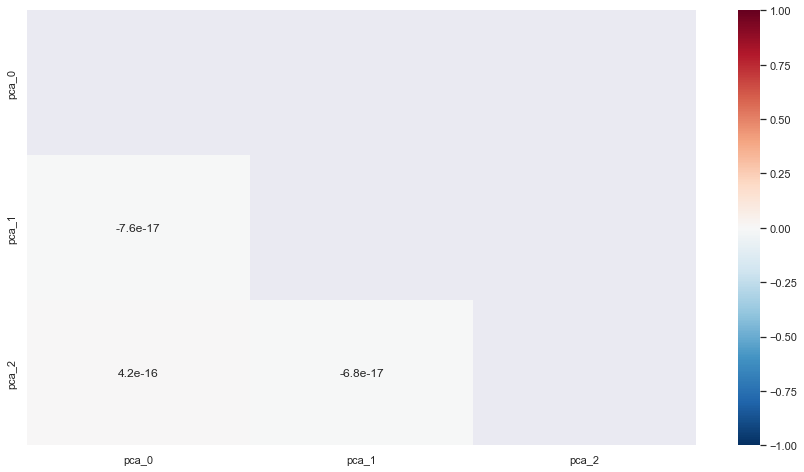

In [109]:
# correlation 
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(features_train_pca.corr(), mask=np.triu(np.ones_like(features_train_pca.corr(), dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='RdBu_r')

## Building the Artificial Neural Network (ANN)

Now I build the ANN. I define 5 hidden layers, each with 50 units ("neurons") and a rectified linear unit activation function. The first hidden layer receives the dimensions of the features (i.e., 3). The output layer contains 1 unit and a sigmoid activation function, which is appropriate for classification tasks.

In [110]:
# ANN with early stopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model_ann_stop = Sequential()

# define hidden layers
hidden_first = Dense(units=50, activation='relu', input_dim=features_train_pca.shape[1])
hidden_second = Dense(units=50, activation='relu')
hidden_third = Dense(units=50, activation='relu')
hidden_fourth = Dense(units=50, activation='relu')
hidden_fifth = Dense(units=50, activation='relu')

# define output layer
output_layer  = Dense(units=1, activation='sigmoid')

# add 5 hidden layers with 50 units
model_ann_stop.add(hidden_first)
model_ann_stop.add(hidden_second)
model_ann_stop.add(hidden_third)
model_ann_stop.add(hidden_fourth)
model_ann_stop.add(hidden_fifth)

# add output layer
model_ann_stop.add(output_layer)

Then I compile the model and add an early stopping mechanism that stops the training when a monitored metric is not improving anymore. In this way and unnecessary computing time and overfitting can be prevented. Finally I fit the model on the training data and validate the classification accuracy on the validation data. The training stops when the validation accuracy does not change more than 0.001 after 3 epochs.

In [111]:
# compile model
model_ann_stop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=3)

# train model using early stopping
hist_ann_stop = model_ann_stop.fit(features_train_pca, target_train,
                                    epochs=200, batch_size=64,
                                    callbacks=[early_stop],
                                    validation_data=(features_val_pca, target_val))

Epoch 1/200
8/8 [==============================] - 1s 45ms/step - loss: 0.6261 - accuracy: 0.8536 - val_loss: 0.5182 - val_accuracy: 0.9707
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4381 - accuracy: 0.9644 - val_loss: 0.3169 - val_accuracy: 0.9707
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2411 - accuracy: 0.9686 - val_loss: 0.1529 - val_accuracy: 0.9756
Epoch 4/200
8/8 [==============================] - 0s 10ms/step - loss: 0.1179 - accuracy: 0.9686 - val_loss: 0.0877 - val_accuracy: 0.9805
Epoch 5/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0838 - accuracy: 0.9686 - val_loss: 0.0773 - val_accuracy: 0.9805
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0792 - accuracy: 0.9686 - val_loss: 0.0751 - val_accuracy: 0.9805
Epoch 7/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0761 - accuracy: 0.9686 - val_loss: 0.0712 - val_accuracy: 0.9805


After a few epochs, the training stops at a validation accuracy of >98% (exact value can vary).

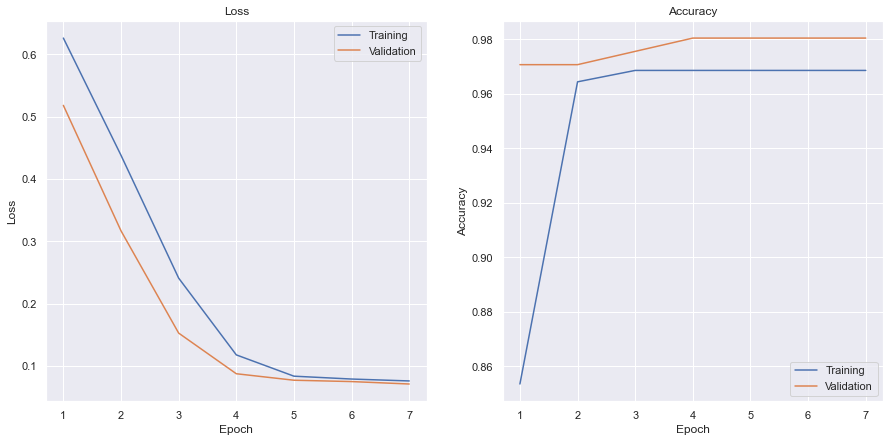

In [112]:
# illustrate 
x = range(1,len(hist_ann_stop.history['loss'])+1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))  
ax1.plot(x, hist_ann_stop.history['loss'])
ax1.plot(x, hist_ann_stop.history['val_loss'])
ax1.set_title('Loss')
ax1.legend(['Training', 'Validation'])
ax1.set(ylabel='Loss', xlabel='Epoch', xticks=x)
#plt.xticks([x])

ax2.plot(x, hist_ann_stop.history['accuracy'])
ax2.plot(x, hist_ann_stop.history['val_accuracy'])
ax2.set_title('Accuracy')
ax2.legend(['Training', 'Validation'])
ax2.set(ylabel='Accuracy', xlabel='Epoch', xticks=x);